In [1]:
"""
This script reproduces Figure 1 in  [1] Rubbens, Anne, and Taylor, Adrien B. " One-point extensions of function and operator classes."

Given (x1,f1,g1)=(0,0,1), x2=1, and L=1, it plots the allowed region for f2 as a function of g2, according to p^{(i)}=p_{alpha_i}, i=1,2,3,4, and
p^{(infty)}=p_{alpha=1}, where 
       -alpha_0=0, alpha_{i+1}=(1+alpha_i)/2, 
       -p_{alpha} is satisfied at {(x_i,f_i,g_i),(x_j,f_j,g_j)} if and only if:
           ||g_i-g_j||^2<=L^2||x_i-x_j||^2, and f_j>=f_i+<g_i,x_j-x_i>+\alpha/2/L ||g_i-g_j||^2.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Matplotlib is building the font cache; this may take a moment.


In [2]:
def extremal_val_smooth_convex_alpha(x1, f1, g1, x2, g2, L, alpha, objective):
    """
    This function computes the extremal value for f2 such that {(x1, f1, g1),(x2, f2, g2)} satisfies p_alpha

    Arguments:
        -x1,f1,g1,x2,g2,f2: values of the dataset to be consistent with p_{alpha}
        -L, alpha: parameters of p_{alpha} 
        -objective: If objective>=0, extremal_val_smooth_convex_alpha computes the minimal value for f2. Else, extremal_val_smooth_convex_alpha computes its maximal value.   

    Returns:
        -Extremal value for f2
    """
    # Initial guess for f2
    f2_0 = 1
    # Objective function for minimization or maximization of f2
    def fun_obj(f2):
        return f2*objective
    # Ensuring that {(x1, f1, g1), (x2, f2, g2)} satisfies p_alpha by bounding f2.
    bounds = [(f1 + np.dot(g1, x2 - x1) + alpha / (2 * L) * np.linalg.norm(g2 - g1)**2, f1 - np.dot(g2, x1 - x2) -alpha / (2 * L) * np.linalg.norm(g1 - g2)**2)]
    # Minimize or maximize f2 using scipy's minimize function
    result = minimize(fun_obj, f2_0, bounds=bounds, options={'disp': False})
    return result.x[0]
      



In [3]:
# Dataset
f1 = 0
x1 = 0
g1 = 1
x2 = 1
L = 1

# Interval of values for g_2
N = 50
G2 = np.linspace(1, 2, N)

# Definition of sequence alpha
K_alpha = 6
alpha = np.zeros(K_alpha)
for i in range(K_alpha - 2):
    alpha[i + 1] = (1 + alpha[i]) / 2
alpha[-1] = 1

# Computation of the extremal values allowed for f2 as a function of g2
f2_min = np.zeros((K_alpha, N))
f2_max = np.zeros((K_alpha, N))

for i in range(N):
    for j in range(K_alpha):
        f2_min[j, i] = extremal_val_smooth_convex_alpha(x1, f1, g1, x2, G2[i], L, alpha[j], 1)
        f2_max[j, i] = extremal_val_smooth_convex_alpha(x1, f1, g1, x2, G2[i], L, alpha[j], -1)


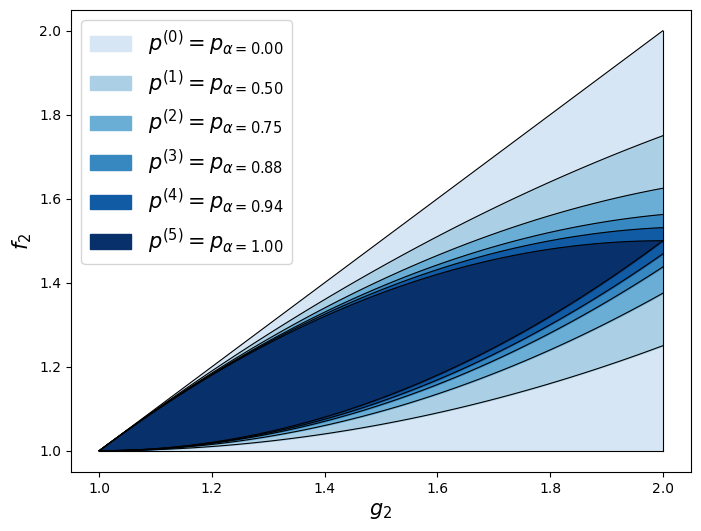

In [7]:
# Plot of the result

plt.figure(figsize=(8, 6))
for i in range(K_alpha):
    plt.fill_between(G2, f2_min[i, :], f2_max[i, :],color=plt.cm.Blues((i+1) / K_alpha), label=f"$p^{{({i})}}=p_{{\\alpha={alpha[i]:.2f}}}$")
    plt.plot(G2, f2_max[i,:], color='black', linewidth=0.8)
    plt.plot(G2, f2_min[i,:], color='black', linewidth=0.8)
plt.plot([2,2],[1,2],color='black',linewidth=0.8)
# Adding labels and formatting
plt.legend(fontsize=15, loc='upper left')
plt.xlabel('$g_2$', fontsize=15)
plt.ylabel('$f_2$', fontsize=15)
plt.xlim([0.95, 2.05])
plt.ylim([0.95, 2.05])
plt.show()